In [1]:
import os
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
path = "/media/jdcloud/"
labels = pd.read_csv(path + "REFERENCE.csv")
labels_en = pd.read_csv(path + "kfold_labels_en.csv")

In [3]:
labels.shape
labels.head()

,File_name,label1,label2,label3,label4,label5,label6,label7,label8,label9,label10
0,TRAIN0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN0001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN0002,4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN0003,6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN0004,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
labels_en.shape

(7939, 16)

In [5]:
labels_en.head()

,Unnamed: 0,File_name,age,dataSize,label1,label10,label2,label3,label4,label5,label6,label7,label8,label9,labels_num,sex
0,0,TRAIN0000,39,5000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,MALE
1,1,TRAIN0001,36,5000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,MALE
2,2,TRAIN0002,80,5000,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE
3,2,TRAIN0002,80,5000,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE
4,3,TRAIN0003,74,5000,6.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,MALE


In [6]:
labels_en.dataSize.max()

45500

In [7]:
labels_en.dataSize.min()

4500

In [8]:
labels_en[labels_en["labels_num"]==1].shape

(5639, 16)

In [9]:
labels_en_drop = labels_en.drop_duplicates(["File_name"])

Text(0.5, 1.0, 'DataSize Distribution')

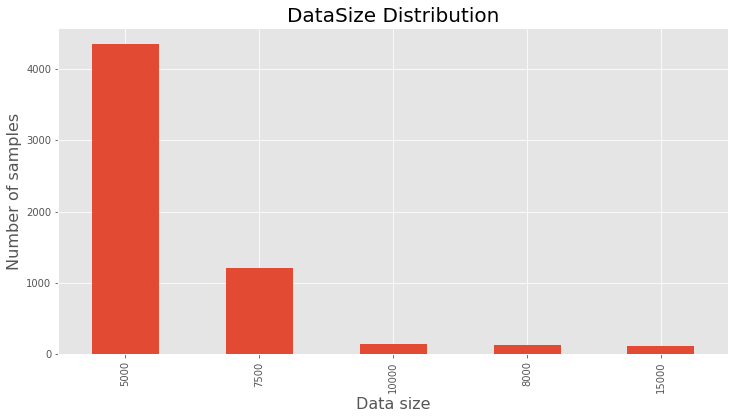

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
#labels_en[labels_en["labels_num"]>=2].dataSize.value_counts()[:5].plot.bar()
ax = labels_en_drop.dataSize.value_counts()[:5].plot.bar()
ax.set_ylabel("Number of samples",size=16)
ax.set_xlabel("Data size",size=16)
ax.set_title("DataSize Distribution",size=20)

In [11]:
labels_en_drop.age.min()

18

In [12]:
labels_en_drop.age.max()

118

Text(0.5, 1.0, 'Age Distribution')

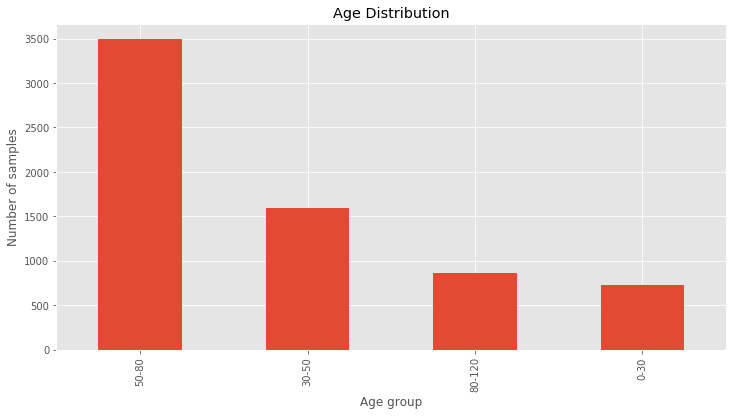

In [13]:
group_names = ["0-30","30-50","50-80","80-120"]
bins = [10,30,50,80,120]
plt.figure(figsize=(12,6))
ax = pd.cut(labels_en_drop.age,bins,labels=group_names).value_counts().plot.bar()
ax.set_ylabel("Number of samples")
ax.set_xlabel("Age group")
ax.set_title("Age Distribution")
#ax.legend()

In [14]:
labels_en_drop.sex.value_counts()

FEMALE    3408
MALE      3269
U           12
Name: sex, dtype: int64

Text(0.5, 1.0, 'Sex Distribution')

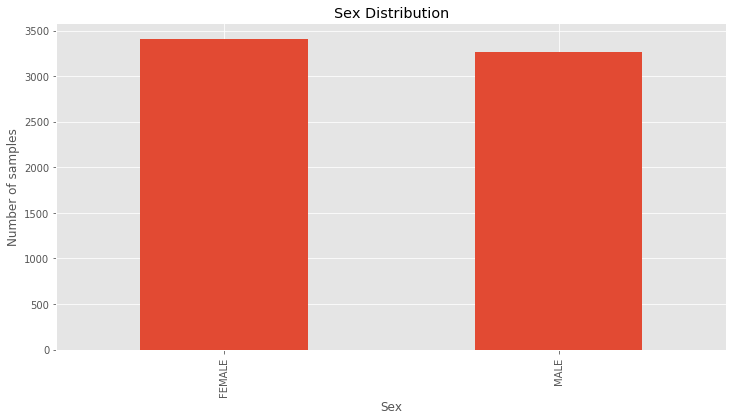

In [15]:
plt.figure(figsize=(12,6))
ax = labels_en_drop.sex.value_counts()[:2].plot.bar()
ax.set_ylabel("Number of samples")
ax.set_xlabel("Sex")
ax.set_title("Sex Distribution")
#ax.legend()

In [16]:
labels_en_drop.labels_num.value_counts()

1    5639
2     869
3     165
4      14
6       1
5       1
Name: labels_num, dtype: int64

Text(0.5, 1.0, 'Num_labels Distribution')

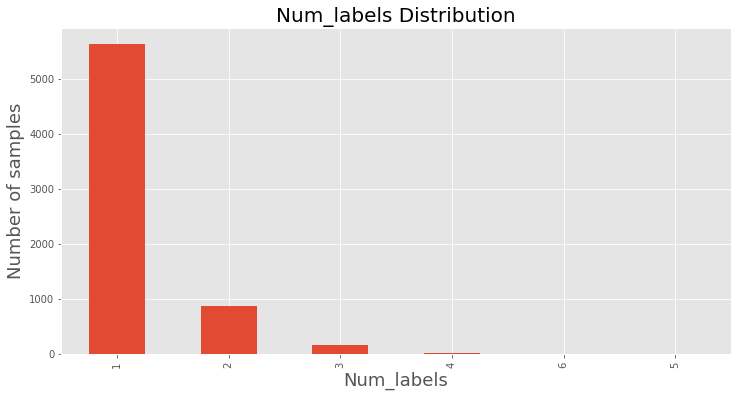

In [19]:
plt.figure(figsize=(12,6))
ax = labels_en_drop.labels_num.value_counts()[:].plot.bar()
ax.set_ylabel("Number of samples",size=18)
ax.set_xlabel("Num_labels",size=18)
ax.set_title("Num_labels Distribution",size=20)
#ax.legend()


In [101]:
pd.Series({0: 1953,
         1: 406,
         2: 414,
         3: 704,
         4: 101,
         5: 502,
         6: 532,
         7: 204,
         8: 1473,
         9: 400}).values.sum()

6689

In [166]:
labels_en.labels_num.value_counts()

1    5639
2    1738
3     495
4      56
6       6
5       5
Name: labels_num, dtype: int64

In [7]:
labels[labels.label1 == 0].shape

(1953, 11)

In [9]:
labels[labels.label1 == 9].shape

(400, 11)

In [31]:
num = 9
labels[labels.label1 == num].shape[0]+\
labels[labels.label2 == num].shape[0]+\
labels[labels.label3 == num].shape[0]+\
labels[labels.label4 == num].shape[0]+\
labels[labels.label5 == num].shape[0]+\
labels[labels.label6 == num].shape[0]

400

In [32]:
1953 + 478 + 492 + 926 + 164 + 627 + 628 + 222 + 2049 + 400

7939

Text(0.5, 1.0, 'Label Distribution')

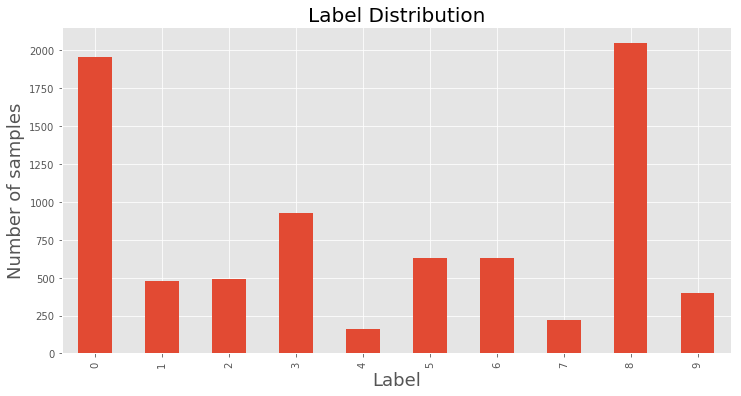

In [18]:
plt.figure(figsize=(12,6))
ax = pd.Series({0: 1953,
         1: 478,
         2: 492,
         3: 926,
         4: 164,
         5: 627,
         6: 628,
         7: 222,
         8: 2049,
         9: 400}).plot.bar()#color="w"

ax.set_ylabel("Number of samples",size=18)

ax.set_xlabel("Label",size=18)
ax.set_title("Label Distribution",size=20)

Text(0.5, 1.0, 'Lable Distribution')

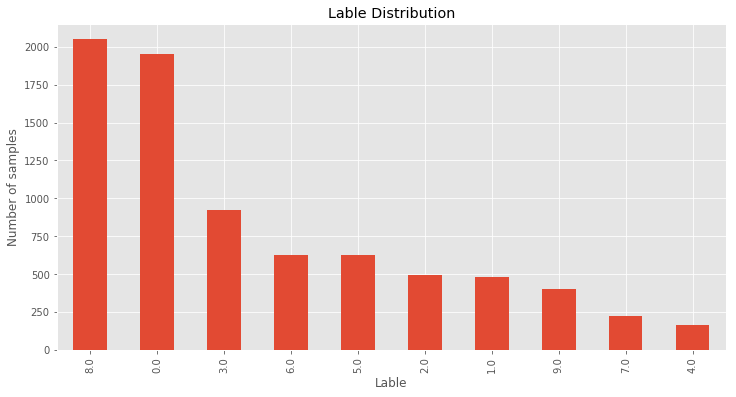

In [37]:
plt.figure(figsize=(12,6))
ax = labels_en.label1.value_counts().plot.bar()
ax.set_ylabel("Number of samples")
ax.set_xlabel("Lable")
ax.set_title("Lable Distribution")

Text(0.5, 1.0, 'Age Distribution')

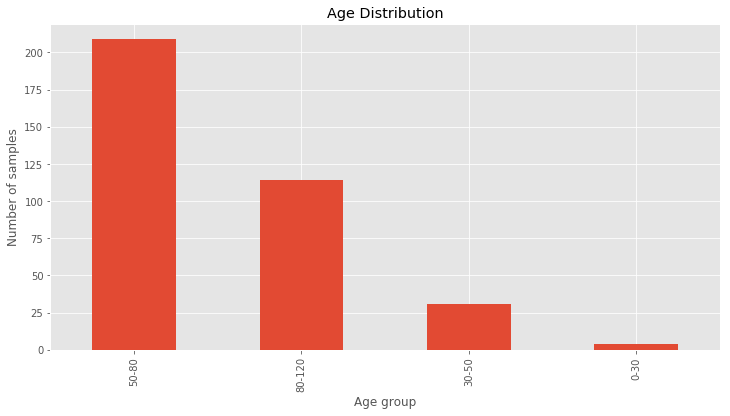

In [57]:
group_names = ["0-30","30-50","50-80","80-120"]
bins = [10,30,50,80,120]
plt.figure(figsize=(12,6))
ax = pd.cut(labels_en_drop[labels_en_drop.label1==2].age,bins,
            labels=group_names).value_counts().plot.bar()
ax.set_ylabel("Number of samples")
ax.set_xlabel("Age group")
ax.set_title("Age Distribution")
#ax.legend()

Text(0.5, 1.0, 'Num_lables Distribution')

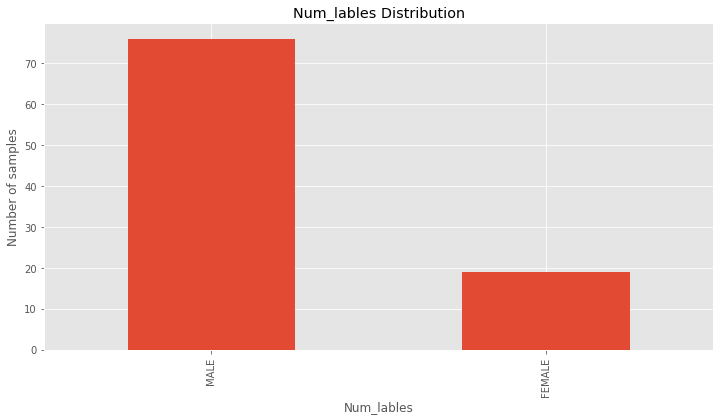

In [71]:
plt.figure(figsize=(12,6))
ax = labels_en_drop[labels_en_drop.label1==4].sex.value_counts()[:].plot.bar()
ax.set_ylabel("Number of samples")
ax.set_xlabel("Num_lables")
ax.set_title("Num_lables Distribution")
#ax.legend()


In [5]:
import scipy.io as sio
import numpy as np
labels[labels.label1==4]
data = np.load("./training_data/TRAIN0000_ori.npy")

In [33]:
data.shape

(10, 2560, 12)

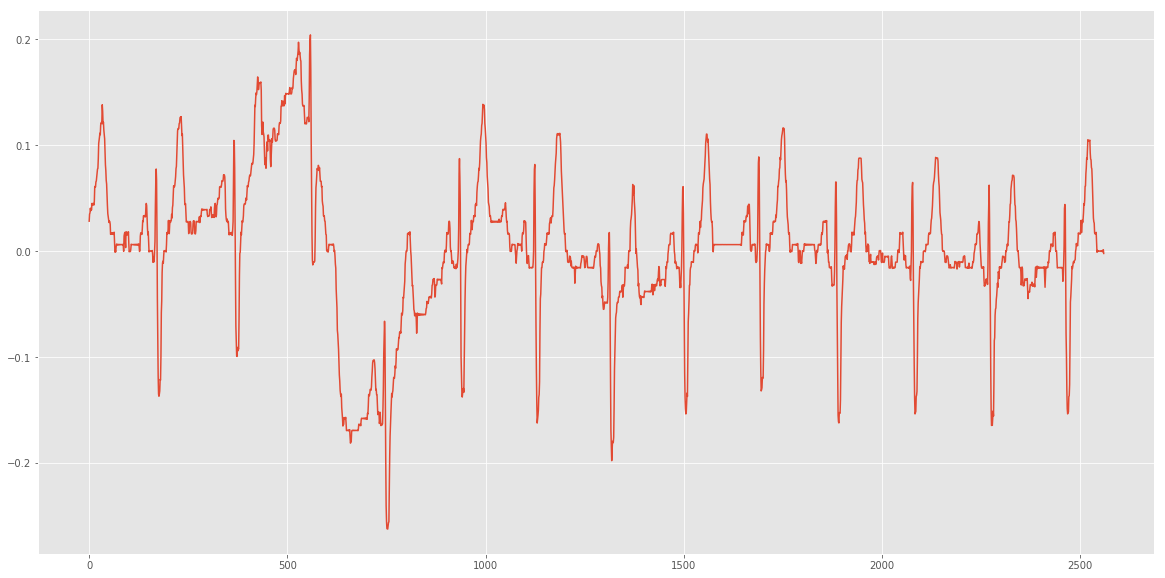

In [34]:
plt.figure(figsize=(20,10))
plt.plot(data[0,:,2])

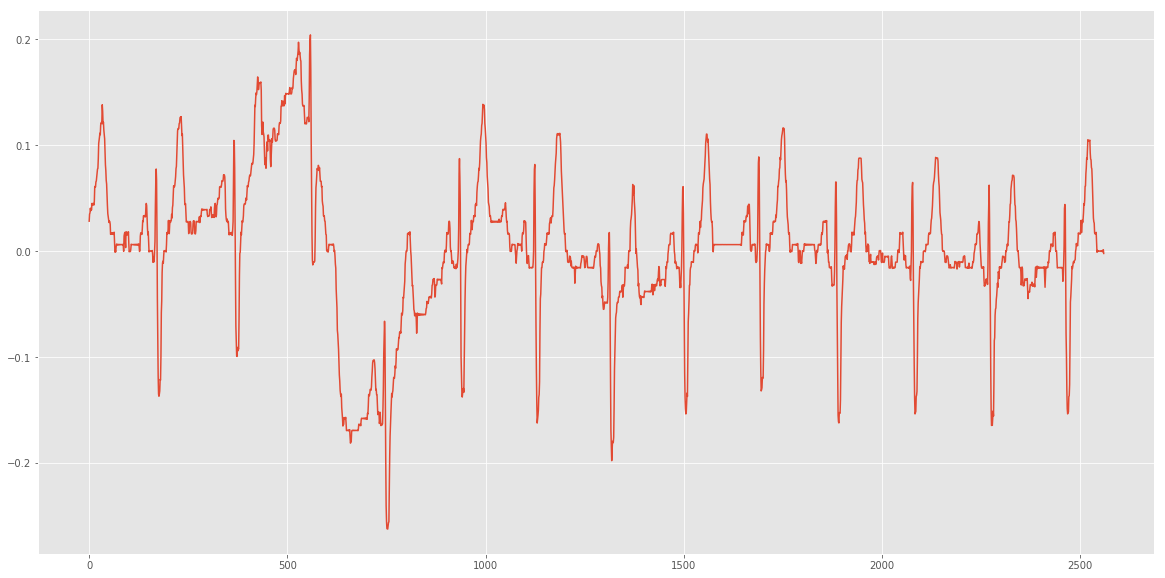

In [35]:
plt.figure(figsize=(20,10))
plt.plot(data[0,:,2])

In [6]:
plt.figure(figsize=(20,10))
plt.plot(data[0,:,2])

NameError: name 'plt' is not defined

In [12]:
(cA3,cD3,cD2,cD1) = pywt.wavedec(sig, 'db6', level=3)

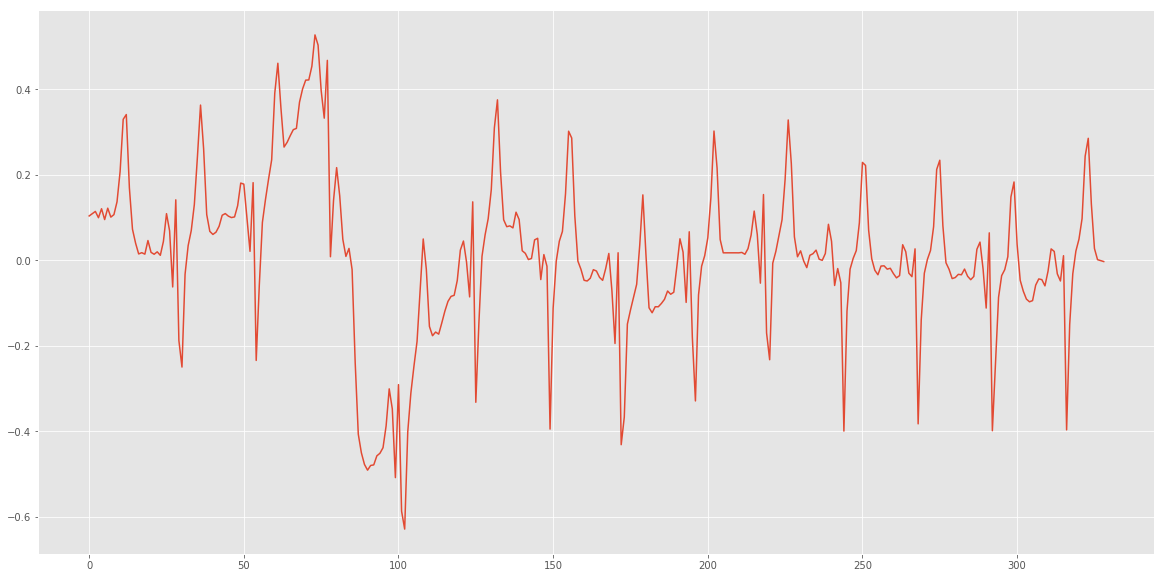

In [23]:
plt.figure(figsize=(20,10))
plt.plot(cA3)

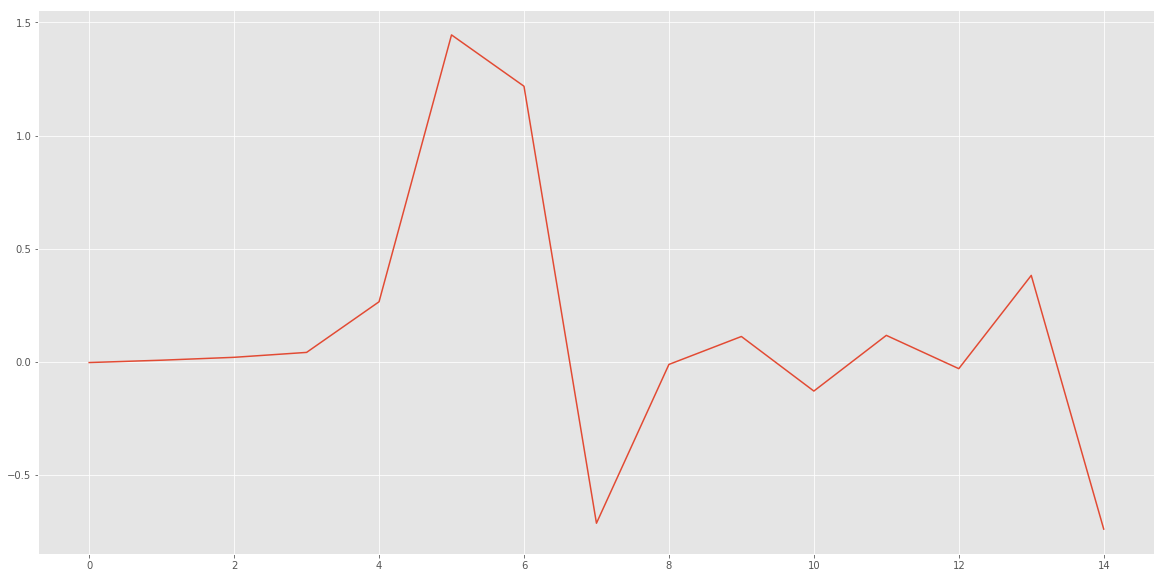

In [9]:
import pywt
sig = data[0,:,2]
coeffs = pywt.wavedec(sig, 'db6', level=9)
#coeffs[-1] = np.zeros(len(coeffs[-1]))
#coeffs[-2] = np.zeros(len(coeffs[-2]))
#coeffs[0] = np.zeros(len(coeffs[0]))
sig_filt = pywt.waverec(coeffs, 'db6')
plt.figure(figsize=(20,10))
plt.plot(coeffs[1])